<a href="https://colab.research.google.com/github/johnsaca/MVP-Sprint-Qualidade-de-Software-Seguran-a-e-Sistemas-Inteligentes/blob/main/MVP_Sprint_Qualidade_de_Software%2C_Seguran%C3%A7a_e_Sistemas_Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP Sprint: Qualidade de Software, Segurança e Sistemas Inteligentes
## Contexto:

**O Dataset escolhido foi o "Heart Attack Risk Prediction Dataset" do portal Kaggle (link: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/) o arquivo .csv relacionado ao dataset foi baixado e inserido no github da entrega do projeto conforme link descrito no código.**
**Algumas alterações foram feitas para que o Dataset melhor funcionasse para a aplicação, elas são:**
1. Sex - Male = 0, Female = 1
2. Adicionado uma coluna para dividir blood pressure em Upper e Lower
3. Diet - Unhealthy = -1, Average = 0, Healthy = 1
**Segue abaixo um resumo do dataset e sua aplicabilidade:**

*Este conjunto de dados fornece uma ampla gama de características relevantes para a saúde do coração e escolhas de estilo de vida, abrangendo detalhes específicos do paciente, como idade, gênero, níveis de colesterol, pressão arterial, frequência cardíaca e indicadores como diabetes, histórico familiar, hábitos de fumar, obesidade e consumo de álcool. Além disso, fatores de estilo de vida como horas de exercício, hábitos alimentares, níveis de estresse e horas sedentárias são incluídos. Aspectos médicos que envolvem problemas cardíacos anteriores, uso de medicamentos e níveis de triglicerídeos também são considerados. Aspectos socioeconômicos, como renda, e atributos geográficos, como país, continente e hemisfério, são incorporados. O conjunto de dados, composto por 8763 registros de pacientes ao redor do mundo, culmina em uma característica de classificação binária crucial que denota a presença ou ausência de risco de ataque cardíaco, proporcionando um recurso abrangente para análises preditivas e pesquisas em saúde cardiovascular.*

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pickle

## Carga do Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/johnsaca/MVP-Sprint-Qualidade-de-Software-Seguran-a-e-Sistemas-Inteligentes/main/heart_attack_prediction_dataset%20adapted%20v2.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=';')

# Mostra as primeiras linhas do dataset
dataset.head(8)

,Age,Sex,Cholesterol,Blood Pressure (Upper),Blood Pressure (Lower),Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,0,208,158,88,72,0,0,1,0,...,6.615001,261.404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,0,389,165,93,98,1,1,1,1,...,4.963459,285.768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,1,324,174,99,72,1,0,0,0,...,9.463426,235.282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,0,383,163,100,73,1,1,1,0,...,7.648981,125.640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,0,318,91,88,93,1,1,1,1,...,1.514821,160.555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,54,1,297,172,86,48,1,1,1,0,...,7.798752,241.339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,90,0,358,102,73,84,0,0,1,0,...,0.627356,190450.000,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,84,0,220,131,68,107,0,0,1,1,...,10.543780,122.093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
# Tamanho do conjunto de teste
test_size = 0.20

# Semente aleatória
seed = 7

# Separação em conjuntos de treino e teste (foram excluidas as ultimas três colunas, pois eram informações textuais)
array = dataset.values
X = array[:,0:22]
y = array[:,25].astype(float)

# Holdout com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y)

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10

# Validação cruzada com estratificação
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.562625 (0.022294)
CART: 0.534807 (0.014114)
NB: 0.633096 (0.010804)
SVM: 0.641797 (0.000428)


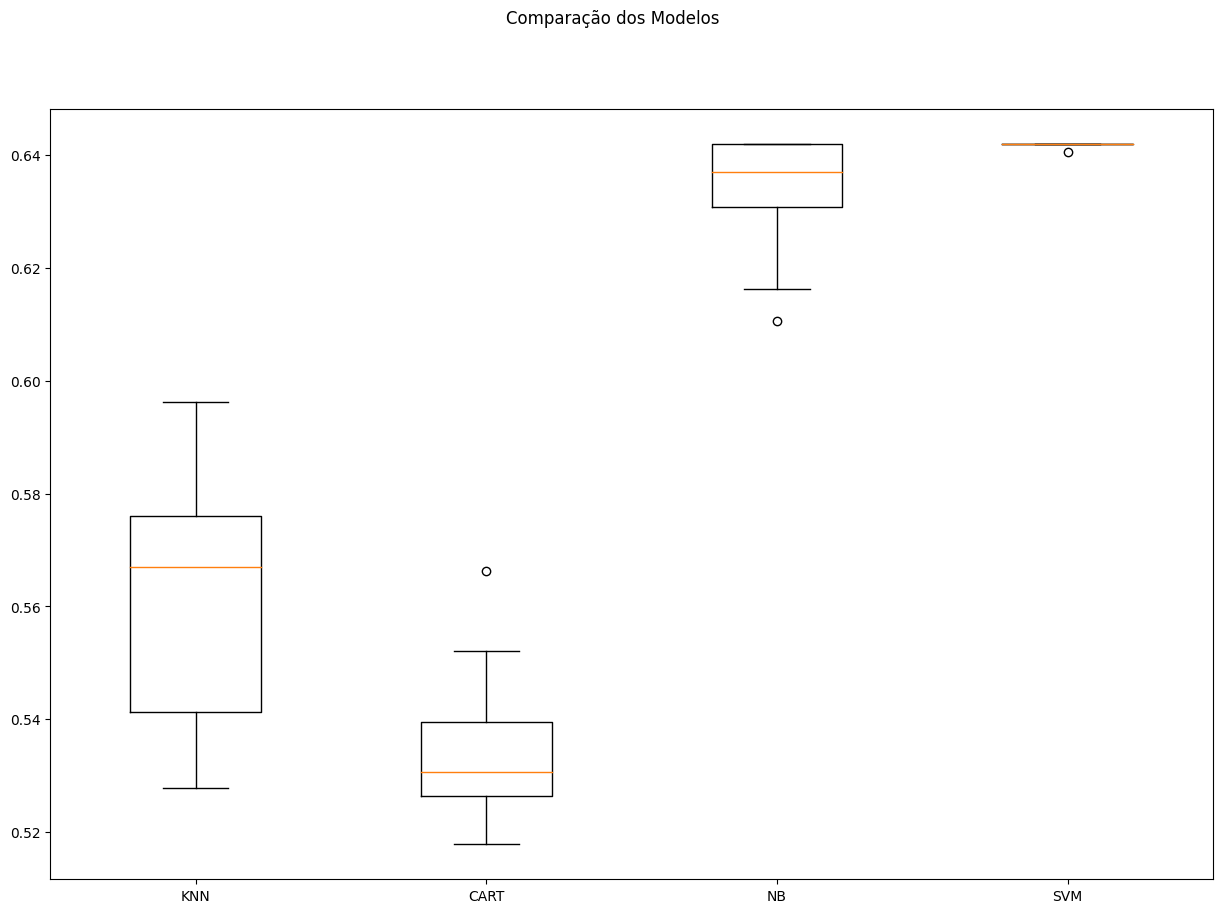

In [ ]:
# Definindo uma semente global
np.random.seed(7)

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.563 (0.022)
CART-orig: 0.535 (0.014)
NB-orig: 0.633 (0.011)
SVM-orig: 0.642 (0.000)
KNN-padr: 0.563 (0.015)
CART-padr: 0.539 (0.020)
NB-padr: 0.633 (0.010)
SVM-padr: 0.641 (0.004)
KNN-norm: 0.567 (0.015)
CART-norm: 0.541 (0.016)
NB-norm: 0.633 (0.010)
SVM-norm: 0.642 (0.001)


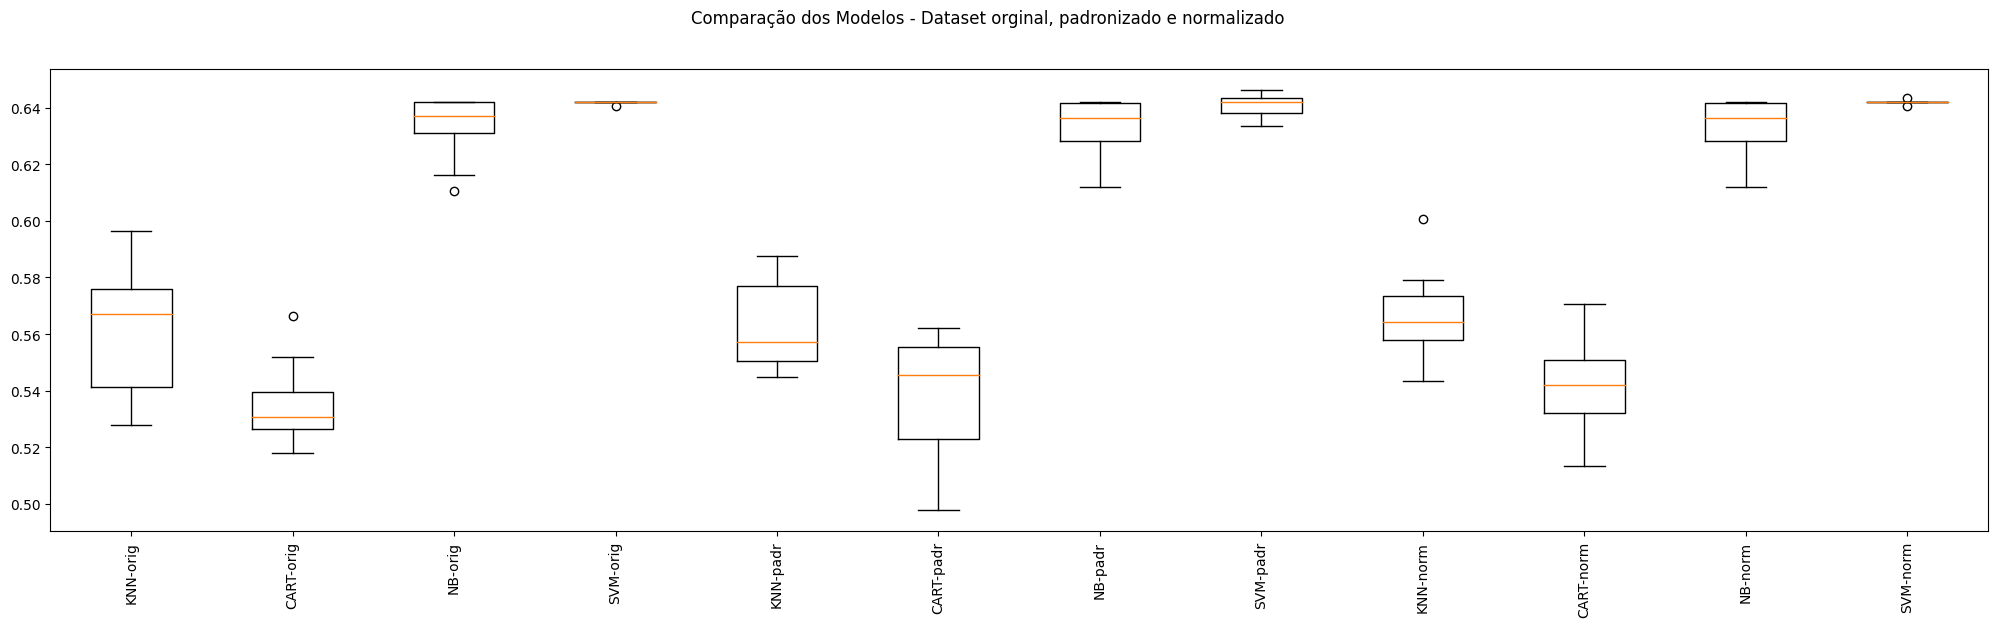

In [ ]:
# Definindo uma semente global para este bloco
np.random.seed(7)

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    # Formatando para 3 casas decimais
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

Testes para entender os percentuais em outras configurações do KNN

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Modelo: knn-orig - Melhor: 0.619401 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21}
Modelo: knn-padr - Melhor: 0.619686 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Modelo: knn-norm - Melhor: 0.618830 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21}


## Finalização do Modelo

Como visto no bloco: "**Criação e avaliação de modelos: dados padronizados e normalizados**" o melhor percentual foi o referente ao SVM-orig pois o seu percentual foi o mesmo entregue pelo SVM-norm mas com um desvio padrão menor, logo iremos seguir com o modelo ***SVM-orig***

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = GaussianNB()
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.6349115801483172


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

GaussianNB()

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {'age':[80, 26, 36],
        'sex':[0, 0, 1],
        'chol':[320, 280, 190],
        'blup':[110, 140, 180],
        'bllow':[80, 80, 100],
        'rate':[60, 75, 80],
        'dia':[1, 0, 1],
        'fam':[0, 1, 0],
        'smok':[1, 1, 0],
        'obes':[0, 0, 0],
        'alco':[0, 1, 1],
        'exer':[2, 6, 12],
        'diet':[0, -1, 1],
        'prev':[0, 0, 0],
        'medi':[1, 0, 1],
        'stress':[1, 8, 8],
        'seden':[5, 10, 2],
        'income':[120, 240, 250],
        'bmi':[28, 31, 18],
        'trigly':[300, 600, 400],
        'activity':[2, 0, 5],
        'sleep':[10, 6, 7],
        }

atributos = ['age','sex','chol','blup','bllow','rate','dia','fam','smok','obes','alco','exer','diet',
             'prev','medi','stress','seden','income','bmi','trigly','activity','sleep']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:22].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 1.23737089e+00 -6.58765153e-01  7.43554091e-01 -9.51693070e-01
  -3.51335969e-01 -7.30990089e-01  7.30113060e-01 -9.86060851e-01
   3.39156833e-01 -1.00285699e+00 -1.21986678e+00 -1.38573542e+00
  -9.63668805e-03 -9.91703931e-01  1.00331486e+00 -1.56312876e+00
  -2.86683173e-01 -2.68974997e-01 -1.41077886e-01 -5.25965346e-01
  -6.52633182e-01  1.49695886e+00]
 [-1.30400933e+00 -6.58765153e-01  2.48863739e-01  1.86892842e-01
  -3.51335969e-01 -1.05510022e-03 -1.36965089e+00  1.01413620e+00
   3.39156833e-01 -1.00285699e+00  8.19761647e-01 -6.94102590e-01
  -1.23349607e+00 -9.91703931e-01 -9.96696089e-01  8.84886999e-01
   1.15583477e+00 -2.66616135e-01  3.33694245e-01  8.14904451e-01
  -1.52884347e+00 -5.14749993e-01]
 [-8.33383367e-01  1.51799165e+00 -8.64189553e-01  1.70500739e+00
   1.01145849e+00  2.42256563e-01  7.30113060e-01 -9.86060851e-01
  -2.94848844e+00 -1.00285699e+00  8.19761647e-01  3.43346653e-01
   1.21422269e+00 -9.91703931e-01  1.00331486e+00  8.84886999e-01
  -1.1

In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 0. 0.]


In [ ]:
# Exportação do arquivo pkl para uso no Back-End
pickle_out = open("modelo_treinado.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()
